# WeatherPy

Three observable trends based on the WeatherPy data:

1. Unsurprisingly, the temperature becomes warmer approaching the equator (i.e., 0 degrees latitude). As we move   north from the equator, the temperature becomes less warm for this time of the year (i.e., beginning of autumn).
2. There is no significant relationship between latitude and humidity. Nonetheless, there seems to be a cluster of  cities in the northern hemispehere above 80% humidity.
3. There are no significant relationships between latitude and cloudiness or wind speed. However, a predominant number of cities in both hemispheres have wind speeds between 0 to 10 mph.




In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
# Installed pip install citipy on Terminal
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

In [4]:
# Set up variables to store reponse data after API call

city_ow = []
lat = []
lon = []
temp = []
humid = []
clouds = []
wind = []

# Create the for loop:
print('------------------------------')
print('Records')
print('------------------------------')

# start the count at 1
number = 1

for city in cities:
    name = city
    print("Retreiving data for City #"+ str(number) + " of " + str((len(cities))) + " ... "  + name )
    query_url = f"{url}appid={api_key}&units={units}&q={city}"#use NY Times- Stu Retrieves - Activity
    print(query_url)
    print('--------------------------------------------------') 
    
    # Create query per normal course

    weather_response = requests.get(query_url).json()
    
    # loop through the response and append above variables to the list
    
    try:
        city_ow.append(weather_response["name"])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        temp.append(weather_response['main']['temp'])
        humid.append(weather_response['main']['humidity'])
        clouds.append(weather_response['clouds']['all'])
        wind.append(weather_response['wind']['speed'])
        number = number + 1
    
    except KeyError:
            print(f'Missing data {number} of {len(cities)}. | Skip {city}')
        
# Add an interval between queries to avert KeyError 403 from the API due to using 60 API calls per minute limit

    time.sleep(1)

------------------------------
Records
------------------------------
Retreiving data for City #1 of 604 ... cidreira
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=cidreira
--------------------------------------------------
City number 1 of 604. | Added cidreira
Retreiving data for City #2 of 604 ... colares
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=colares
--------------------------------------------------
City number 2 of 604. | Added colares
Retreiving data for City #3 of 604 ... banmo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=banmo
--------------------------------------------------
Missing data 3 of 604. | Skip banmo
Retreiving data for City #3 of 604 ... cherskiy
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=cherskiy
--------------------------------

City number 31 of 604. | Added saskylakh
Retreiving data for City #32 of 604 ... ormara
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=ormara
--------------------------------------------------
City number 32 of 604. | Added ormara
Retreiving data for City #33 of 604 ... clyde river
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=clyde river
--------------------------------------------------
City number 33 of 604. | Added clyde river
Retreiving data for City #34 of 604 ... taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=taolanaro
--------------------------------------------------
Missing data 34 of 604. | Skip taolanaro
Retreiving data for City #34 of 604 ... qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=qaanaaq
--------------------------------------

City number 61 of 604. | Added aksarka
Retreiving data for City #62 of 604 ... hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=hithadhoo
--------------------------------------------------
City number 62 of 604. | Added hithadhoo
Retreiving data for City #63 of 604 ... coro
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=coro
--------------------------------------------------
City number 63 of 604. | Added coro
Retreiving data for City #64 of 604 ... castro
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=castro
--------------------------------------------------
City number 64 of 604. | Added castro
Retreiving data for City #65 of 604 ... nikel
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=nikel
--------------------------------------------------
City number 65

Retreiving data for City #91 of 604 ... san joaquin
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=san joaquin
--------------------------------------------------
City number 91 of 604. | Added san joaquin
Retreiving data for City #92 of 604 ... merauke
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=merauke
--------------------------------------------------
City number 92 of 604. | Added merauke
Retreiving data for City #93 of 604 ... lisala
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=lisala
--------------------------------------------------
City number 93 of 604. | Added lisala
Retreiving data for City #94 of 604 ... pacifica
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=pacifica
--------------------------------------------------
City number 94 of 604. | Added p

Retreiving data for City #121 of 604 ... garden city
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=garden city
--------------------------------------------------
City number 121 of 604. | Added garden city
Retreiving data for City #122 of 604 ... gorontalo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=gorontalo
--------------------------------------------------
City number 122 of 604. | Added gorontalo
Retreiving data for City #123 of 604 ... glenwood springs
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=glenwood springs
--------------------------------------------------
City number 123 of 604. | Added glenwood springs
Retreiving data for City #124 of 604 ... barabai
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=barabai
------------------------------------------

Retreiving data for City #151 of 604 ... saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=saint-augustin
--------------------------------------------------
City number 151 of 604. | Added saint-augustin
Retreiving data for City #152 of 604 ... shaoyang
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=shaoyang
--------------------------------------------------
City number 152 of 604. | Added shaoyang
Retreiving data for City #153 of 604 ... forbes
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=forbes
--------------------------------------------------
City number 153 of 604. | Added forbes
Retreiving data for City #154 of 604 ... fillan
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=fillan
--------------------------------------------------
City number 154 o

City number 180 of 604. | Added fort nelson
Retreiving data for City #181 of 604 ... palu
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=palu
--------------------------------------------------
City number 181 of 604. | Added palu
Retreiving data for City #182 of 604 ... bandiagara
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=bandiagara
--------------------------------------------------
City number 182 of 604. | Added bandiagara
Retreiving data for City #183 of 604 ... eyrarbakki
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=eyrarbakki
--------------------------------------------------
City number 183 of 604. | Added eyrarbakki
Retreiving data for City #184 of 604 ... yerbogachen
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=yerbogachen
--------------------------

Retreiving data for City #213 of 604 ... olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=olafsvik
--------------------------------------------------
Missing data 213 of 604. | Skip olafsvik
Retreiving data for City #213 of 604 ... trebukhiv
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=trebukhiv
--------------------------------------------------
City number 213 of 604. | Added trebukhiv
Retreiving data for City #214 of 604 ... half moon bay
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=half moon bay
--------------------------------------------------
City number 214 of 604. | Added half moon bay
Retreiving data for City #215 of 604 ... outjo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=outjo
--------------------------------------------------
City number 2

Retreiving data for City #240 of 604 ... sobolevo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=sobolevo
--------------------------------------------------
City number 240 of 604. | Added sobolevo
Retreiving data for City #241 of 604 ... sanchor
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=sanchor
--------------------------------------------------
City number 241 of 604. | Added sanchor
Retreiving data for City #242 of 604 ... colac
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=colac
--------------------------------------------------
City number 242 of 604. | Added colac
Retreiving data for City #243 of 604 ... pangkalanbuun
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=pangkalanbuun
--------------------------------------------------
City number 243 of 604. | A

Retreiving data for City #270 of 604 ... kununurra
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=kununurra
--------------------------------------------------
City number 270 of 604. | Added kununurra
Retreiving data for City #271 of 604 ... brainerd
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=brainerd
--------------------------------------------------
City number 271 of 604. | Added brainerd
Retreiving data for City #272 of 604 ... taybad
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=taybad
--------------------------------------------------
City number 272 of 604. | Added taybad
Retreiving data for City #273 of 604 ... takoradi
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=takoradi
--------------------------------------------------
City number 273 of 604. | Ad

Retreiving data for City #298 of 604 ... vaitupu
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=vaitupu
--------------------------------------------------
Missing data 298 of 604. | Skip vaitupu
Retreiving data for City #298 of 604 ... kulhudhuffushi
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=kulhudhuffushi
--------------------------------------------------
City number 298 of 604. | Added kulhudhuffushi
Retreiving data for City #299 of 604 ... port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=port lincoln
--------------------------------------------------
City number 299 of 604. | Added port lincoln
Retreiving data for City #300 of 604 ... san-pedro
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=san-pedro
-----------------------------------------------

Retreiving data for City #328 of 604 ... talaya
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=talaya
--------------------------------------------------
City number 328 of 604. | Added talaya
Retreiving data for City #329 of 604 ... laguna
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=laguna
--------------------------------------------------
City number 329 of 604. | Added laguna
Retreiving data for City #330 of 604 ... gizo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=gizo
--------------------------------------------------
City number 330 of 604. | Added gizo
Retreiving data for City #331 of 604 ... katsina
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=katsina
--------------------------------------------------
City number 331 of 604. | Added katsina
Retreiving 

Retreiving data for City #358 of 604 ... khani
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=khani
--------------------------------------------------
City number 358 of 604. | Added khani
Retreiving data for City #359 of 604 ... rincon
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=rincon
--------------------------------------------------
City number 359 of 604. | Added rincon
Retreiving data for City #360 of 604 ... slave lake
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=slave lake
--------------------------------------------------
City number 360 of 604. | Added slave lake
Retreiving data for City #361 of 604 ... rudnichnyy
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=rudnichnyy
--------------------------------------------------
City number 361 of 604. | Adde

City number 386 of 604. | Added bara
Retreiving data for City #387 of 604 ... kamenka
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=kamenka
--------------------------------------------------
City number 387 of 604. | Added kamenka
Retreiving data for City #388 of 604 ... akyab
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=akyab
--------------------------------------------------
Missing data 388 of 604. | Skip akyab
Retreiving data for City #388 of 604 ... korla
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=korla
--------------------------------------------------
Missing data 388 of 604. | Skip korla
Retreiving data for City #388 of 604 ... marzuq
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=marzuq
--------------------------------------------------
City number 3

Retreiving data for City #414 of 604 ... tura
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=tura
--------------------------------------------------
City number 414 of 604. | Added tura
Retreiving data for City #415 of 604 ... kodinsk
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=kodinsk
--------------------------------------------------
City number 415 of 604. | Added kodinsk
Retreiving data for City #416 of 604 ... port-cartier
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=port-cartier
--------------------------------------------------
City number 416 of 604. | Added port-cartier
Retreiving data for City #417 of 604 ... casper
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=casper
--------------------------------------------------
City number 417 of 604. | Added 

City number 444 of 604. | Added otradnoye
Retreiving data for City #445 of 604 ... kailua
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=kailua
--------------------------------------------------
City number 445 of 604. | Added kailua
Retreiving data for City #446 of 604 ... nagua
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=nagua
--------------------------------------------------
City number 446 of 604. | Added nagua
Retreiving data for City #447 of 604 ... san cristobal
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=san cristobal
--------------------------------------------------
City number 447 of 604. | Added san cristobal
Retreiving data for City #448 of 604 ... zhuanghe
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=zhuanghe
----------------------------------

Retreiving data for City #474 of 604 ... borujan
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=borujan
--------------------------------------------------
Missing data 474 of 604. | Skip borujan
Retreiving data for City #474 of 604 ... carndonagh
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=carndonagh
--------------------------------------------------
City number 474 of 604. | Added carndonagh
Retreiving data for City #475 of 604 ... kanashevo
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=kanashevo
--------------------------------------------------
City number 475 of 604. | Added kanashevo
Retreiving data for City #476 of 604 ... galgani
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=galgani
--------------------------------------------------
Missing data 476 of 6

Retreiving data for City #502 of 604 ... santiago del estero
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=santiago del estero
--------------------------------------------------
City number 502 of 604. | Added santiago del estero
Retreiving data for City #503 of 604 ... broome
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=broome
--------------------------------------------------
City number 503 of 604. | Added broome
Retreiving data for City #504 of 604 ... uhlove
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=uhlove
--------------------------------------------------
City number 504 of 604. | Added uhlove
Retreiving data for City #505 of 604 ... belmonte
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=belmonte
--------------------------------------------------
City

City number 530 of 604. | Added miyako
Retreiving data for City #531 of 604 ... puerto colombia
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=puerto colombia
--------------------------------------------------
City number 531 of 604. | Added puerto colombia
Retreiving data for City #532 of 604 ... udachnyy
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=udachnyy
--------------------------------------------------
City number 532 of 604. | Added udachnyy
Retreiving data for City #533 of 604 ... blois
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=blois
--------------------------------------------------
City number 533 of 604. | Added blois
Retreiving data for City #534 of 604 ... bilma
http://api.openweathermap.org/data/2.5/weather?appid=70175f1f3d4c73e1bd260df165206e8e&units=Imperial&q=bilma
-------------------------------

In [29]:
#Create Pandas dataFrame

city_data_df = pd.DataFrame({'City': city_ow,
                            'Latitude': lat,
                            'Longitude': lon,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df,'city_data.csv')


city_data_df


City  Latitude  Longitude  Temperature  Humidity  Cloudiness  \
0        Cidreira    -30.17     -50.22        61.28        69         100   
1         Colares     38.80      -9.45        66.60        82          20   
2        Cherskiy     68.75     161.30        31.40        95          96   
3        Orotukan     62.26     151.67        27.44        54          24   
4    Punta Arenas    -53.16     -70.91        58.26        41           0   
..            ...       ...        ...          ...       ...         ...   
543      Camacupa    -12.02      17.48        63.98        58          93   
544       Magadan     59.56     150.80        37.88        50           0   
545     Maniitsoq     65.42     -52.90        41.66        88           8   
546      Surskoye     54.48      46.71        43.46        81         100   
547        Kaihua     29.14     118.41        62.90        75           0   

     Wind Speed  
0          8.52  
1         16.11  
2          6.20  
3          2.21  
4         20.80  
..          ...  
543        5.41  
544        8.72  
545       12.15  
546        6.35  
547        2.89  

[548 rows x 7 columns]

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [30]:
#Reset index to "City"
city_data_df = city_data_df.set_index('City')
city_data_df

Latitude  Longitude  Temperature  Humidity  Cloudiness  \
City                                                                   
Cidreira        -30.17     -50.22        61.28        69         100   
Colares          38.80      -9.45        66.60        82          20   
Cherskiy         68.75     161.30        31.40        95          96   
Orotukan         62.26     151.67        27.44        54          24   
Punta Arenas    -53.16     -70.91        58.26        41           0   
...                ...        ...          ...       ...         ...   
Camacupa        -12.02      17.48        63.98        58          93   
Magadan          59.56     150.80        37.88        50           0   
Maniitsoq        65.42     -52.90        41.66        88           8   
Surskoye         54.48      46.71        43.46        81         100   
Kaihua           29.14     118.41        62.90        75           0   

              Wind Speed  
City                      
Cidreira            8.52  
Colares            16.11  
Cherskiy            6.20  
Orotukan            2.21  
Punta Arenas       20.80  
...                  ...  
Camacupa            5.41  
Magadan             8.72  
Maniitsoq          12.15  
Surskoye            6.35  
Kaihua              2.89  

[548 rows x 6 columns]

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

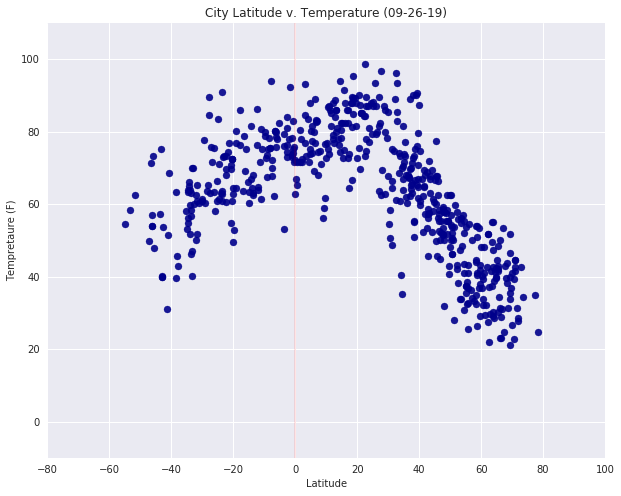

In [175]:
#Try to emulate the homework output graphs in terms of style
x, y = city_data_df['Latitude'], city_data_df['Temperature']

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.scatter(x, y, label=None,color= 'DarkBlue', alpha=0.9)
    plt.xlabel('Latitude', fontsize=10)
    plt.ylabel('Tempretaure (F)',fontsize=10)
    plt.grid()
    plt.title('City Latitude v. Temperature (09-26-19)',fontsize=12)
    plt.xlim(-80, 100)
    plt.ylim (-10, 110) 
    plt.axvspan(0,0, color='red', alpha=0.7)
#save plot
plt.savefig("City Latitude v. Temperature (09-26-19).png")
plt.show()       

#### Latitude vs. Humidity Plot

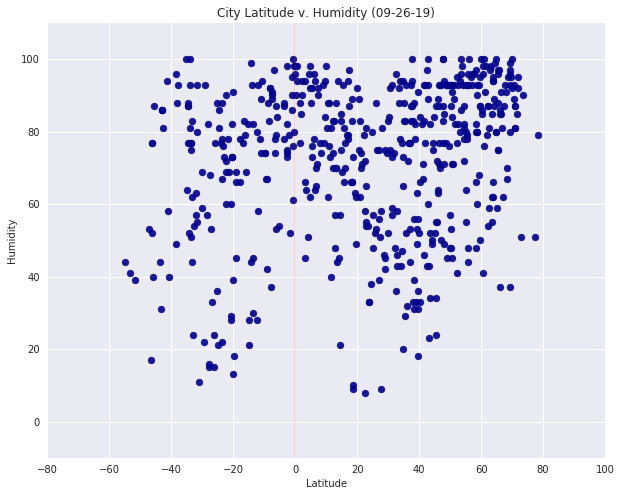

In [176]:
x, y = city_data_df['Latitude'], city_data_df['Humidity']

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.scatter(x, y, label=None,color= 'DarkBlue', alpha=0.9)
    plt.xlabel('Latitude', fontsize=10)
    plt.ylabel('Humidity',fontsize=10)
    plt.grid()
    plt.title('City Latitude v. Humidity (09-26-19)',fontsize=12)
    plt.xlim(-80, 100)
    plt.ylim (-10, 110) 
    plt.axvspan(0,0, color='red', alpha=0.7)

#save plot
plt.savefig("City Latitude v. Humidity (09-26-19).png")
plt.show()

#### Latitude vs. Cloudiness Plot

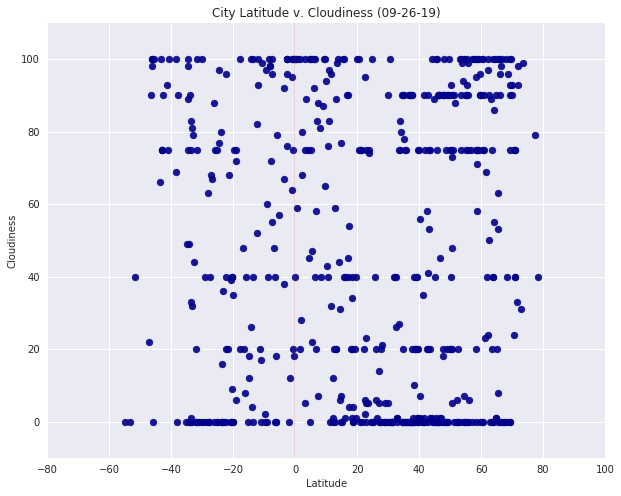

In [177]:
x, y = city_data_df['Latitude'], city_data_df['Cloudiness']

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.scatter(x, y, label=None,color= 'DarkBlue', alpha=0.9)
    plt.xlabel('Latitude', fontsize=10)
    plt.ylabel('Cloudiness',fontsize=10)
    plt.grid()
    plt.title('City Latitude v. Cloudiness (09-26-19)',fontsize=12)
    plt.xlim(-80, 100)
    plt.ylim (-10, 110) 
    plt.axvspan(0,0, color='red', alpha=0.7)

#save plot
plt.savefig("City Latitude v. Cloudiness (09-26-19).png")    
plt.show()

#### Latitude vs. Wind Speed Plot

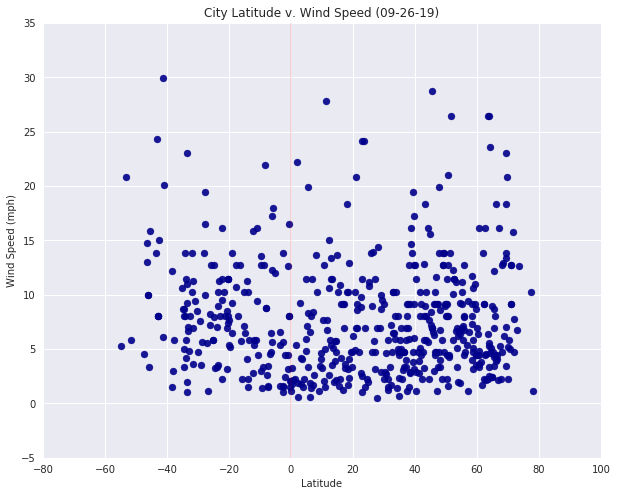

In [178]:
x, y = city_data_df['Latitude'], city_data_df['Wind Speed']

with plt.style.context('seaborn'):
    plt.figure(figsize=(10,8))
    plt.grid()
    plt.scatter(x, y, label=None,color= 'DarkBlue', alpha=0.9)
    plt.xlabel('Latitude', fontsize=10)
    plt.ylabel('Wind Speed (mph)',fontsize=10)
    plt.grid()
    plt.title('City Latitude v. Wind Speed (09-26-19)',fontsize=12)
    plt.xlim(-80, 100)
    plt.ylim (-5, 35) 
    plt.axvspan(0,0, color='red', alpha=0.7)

#save plot    

plt.savefig("City Latitude v. Wind Speed (09-26-19).png")

plt.show()